In [1]:
import numpy as np
import pandas as pd 
import regex as re
import math

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/mobile-phone-price/Mobile phone price.csv


<h2>This dataset contains information on the prices of several mobile phones from different brands. It includes details such as the storage capacity, RAM, screen size, camera specifications, battery capacity, and price of each device.</h2>

<h4>Link to the dataset: https://www.kaggle.com/datasets/rkiattisak/mobile-phone-price</h4>



<h1> Data cleaning </h1>

In [2]:
df = pd.read_csv('/kaggle/input/mobile-phone-price/Mobile phone price.csv')
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [3]:
df.shape

(407, 8)

<h2>Feature type checking</h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


<h2> Checking for missing data </h2>

In [5]:
df.isna().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

<h2> Checking for duplicates </h2>

In [6]:
df[df.duplicated()]

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
45,Apple,iPhone 12 Mini,64 GB,4 GB,5.4,12 + 12,2227,699
61,Xiaomi,Poco M3 Pro 5G,64 GB,4 GB,6.5,48 + 2 + 2,5000,199
132,Nokia,XR20,128GB,6GB,6.67,48MP + 13MP,4630,$549
170,Motorola,Moto G Stylus 5G,128GB,5GB,6.8,48MP + 8MP + 5MP,5000,$399
195,Oppo,A74 5G,128GB,6GB,6.5,48MP + 2MP + 2MP,5000,$299
221,Vivo,Y12s,32GB,3GB,6.51,13MP + 2MP,5000,$149
229,Xiaomi,Redmi Note 10 Pro Max,128GB,8GB,6.67,108MP + 8MP + 5MP + 2MP,5020,$329
240,Nokia,C20 Plus,32GB,3GB,6.5,8MP + 2MP,4950,$99
246,Xiaomi,Poco X3 Pro,128GB,6GB,6.67,48MP + 8MP + 2MP + 2MP,5160,$249
248,Oppo,A16,32GB,3GB,6.52,13MP + 2MP + 2MP,5000,$149


In [7]:
df1 = df.drop_duplicates()
print('We have removed {0} duplicates!'.format(len(df) - len(df1)))

We have removed 26 duplicates!


In [8]:
df1['Brand'].value_counts()

Brand
Samsung       73
Xiaomi        62
Oppo          53
Realme        43
Vivo          33
Apple         28
Nokia         24
Motorola      22
OnePlus       14
Huawei        12
Google         5
Asus           4
LG             3
Blackberry     3
Sony           1
CAT            1
Name: count, dtype: int64

<h2> Applying Feature Engineering to the 'Price' feature. </h2>

In [9]:
df1['Price ($)'].value_counts()

Price ($)
$279       15
$199       15
$149       15
$299       13
$179       11
           ..
459         1
$849        1
99          1
$1,299      1
1049        1
Name: count, Length: 89, dtype: int64

In [10]:
df1['Price_1 ($)'] = df1['Price ($)'].str.replace(r'[\$|\,]', '', regex = True).str.strip().astype(int)
df1.drop(axis = 1, columns = 'Price ($)', inplace = True)
df1.rename(columns = {'Price_1 ($)' : 'Price ($)'}, inplace = True)
df1.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


<h2> Applying Feature Engineering to the 'Camera' feature. I divided it into four new columns, so that each column contains only one camera. If there are less than 4 cameras, then the empty values will be filled with NaN. </h2>

In [11]:
df1['Camera (MP)'].unique()

array(['12 + 12 + 12', '108 + 10 + 10 + 12', '48 + 50 + 8 + 2',
       '64 + 8 + 5 + 2', '50 + 12.2', '12 + 12', '48 + 8 + 2 + 2',
       '50 + 13 + 16 + 2', '50 + 48 + 12 + 8', '64 + 8 + 2',
       '64 + 12 + 5 + 5', '50 + 50 + 13 + 3', '64 + 8 + 5',
       '64 + 12 + 12', '50 + 2 + 2', '48 + 2 + 2', '50 + 8 + 2 + 2',
       '48 + 5', '48 + 50 + 2', '108 + 8 + 5 + 2', '13 + 2 + 2', '13 + 2',
       '12', '48 + 5 + 2', '50 + 8 + 2', '64 + 8 + 2 + 2', '48 + 8 + 5',
       '64 + 8', '48 + 5 + 2 + 2', '50 + 2', '64 + 12 + 8 + 5', '64 + 2',
       '48 + 13 + 13', '12MP + 12MP', '64MP + 12MP + 12MP',
       '50MP + 8MP + 2MP', '50MP + 12MP', '48MP + 8MP + 2MP + 2MP',
       '64MP + 8MP + 2MP', '50MP + 48MP + 12MP + 8MP',
       '50MP + 16MP + 13MP + 2MP', '108MP + 16MP + 8MP', '48MP + 13MP',
       '12MP + 12MP + 12MP', '64MP + 13MP + 12MP', '64MP + 12MP + 8MP',
       '13MP + 5MP', '64MP + 12MP + 8MP + 5MP', '108MP + 8MP + 5MP + 2MP',
       '48MP + 50MP + 2MP', '50MP + 2MP + 2MP', '108MP 

In [12]:
df1['Camera (MP)'] = df1['Camera (MP)'].str.replace(r'MP', '', regex = True)
df1['Camera (MP)'] = df1['Camera (MP)'].str.replace(r' ', '', regex = True)
df1['Camera (MP)'].unique()

array(['12+12+12', '108+10+10+12', '48+50+8+2', '64+8+5+2', '50+12.2',
       '12+12', '48+8+2+2', '50+13+16+2', '50+48+12+8', '64+8+2',
       '64+12+5+5', '50+50+13+3', '64+8+5', '64+12+12', '50+2+2',
       '48+2+2', '50+8+2+2', '48+5', '48+50+2', '108+8+5+2', '13+2+2',
       '13+2', '12', '48+5+2', '50+8+2', '64+8+2+2', '48+8+5', '64+8',
       '48+5+2+2', '50+2', '64+12+8+5', '64+2', '48+13+13', '50+12',
       '50+16+13+2', '108+16+8', '48+13', '64+13+12', '64+12+8', '13+5',
       '108+8+2', '64+5+2+2', '64+12', '48+50+8', '50+48+48', '8+2',
       '12+12+8', '64+13+5', '12+13', '64+8+5+5', '48+8+2', '48+2',
       '108+12+10+10', '50+5', '48+8+5+5', '108+8+2+2', '13', '48+8+5+2',
       '13+5+2', '8', '13+5+2+2', '13+8+5+2', '13+8+2+2', '12+2+2',
       '13+8+2', '25+8+5', '108+12+12', '12.2+16', '50+20+12+3D',
       '64+12+2+2', '108+13+5', '48+16+5+2', '12+7', '50+12+40+3D',
       '50+8+16+2', '48+12+5', '48+48+8+5', '40+40+8+3D', '48+12+13',
       '40+20+8+ToF', '48+16+8

In [13]:
df1[(df1['Camera (MP)'] == '50+20+12+3D') | (df1['Camera (MP)'] == '50+12+40+3D') | (df1['Camera (MP)'] == '40+40+8+3D') | (df1['Camera (MP)'] == '40+20+8+ToF') | (df1['Camera (MP)'] == '50+40+12+3D') | (df1['Camera (MP)'] == '108+48+12+3D') | (df1['Camera (MP)'] == '108+48+12+0.3')]

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
292,Huawei,Mate 40 Pro,256,8,6.76,50+20+12+3D,4400,1199
312,Huawei,P40 Pro,256,8,6.58,50+12+40+3D,4200,1099
330,Huawei,Mate 30 Pro 5G,256,8,6.53,40+40+8+3D,4500,1099
342,Huawei,P30 Pro,256,8,6.47,40+20+8+ToF,4200,999
361,Huawei,P40 Pro+,512,8,6.58,50+40+12+3D,4200,1399
367,Samsung,Galaxy S20 Ultra 5G,512,16,6.9,108+48+12+3D,5000,1399
376,Huawei,P40 Pro,256,8,6.58,50+12+40+3D,4200,999
392,Samsung,Galaxy S20 Ultra 5G,128,12,6.9,108+48+12+0.3,5000,1199


In [14]:
df1['Camera (MP)'] = df1['Camera (MP)'].str.replace(r'\+3D', '', regex = True)
df1['Camera (MP)'] = df1['Camera (MP)'].str.replace(r'\+ToF', '', regex = True)
df1['Camera (MP)'] = df1['Camera (MP)'].str.replace(r'\+0\.3', '', regex = True)
df1['Camera (MP)'].unique()

array(['12+12+12', '108+10+10+12', '48+50+8+2', '64+8+5+2', '50+12.2',
       '12+12', '48+8+2+2', '50+13+16+2', '50+48+12+8', '64+8+2',
       '64+12+5+5', '50+50+13+3', '64+8+5', '64+12+12', '50+2+2',
       '48+2+2', '50+8+2+2', '48+5', '48+50+2', '108+8+5+2', '13+2+2',
       '13+2', '12', '48+5+2', '50+8+2', '64+8+2+2', '48+8+5', '64+8',
       '48+5+2+2', '50+2', '64+12+8+5', '64+2', '48+13+13', '50+12',
       '50+16+13+2', '108+16+8', '48+13', '64+13+12', '64+12+8', '13+5',
       '108+8+2', '64+5+2+2', '64+12', '48+50+8', '50+48+48', '8+2',
       '12+12+8', '64+13+5', '12+13', '64+8+5+5', '48+8+2', '48+2',
       '108+12+10+10', '50+5', '48+8+5+5', '108+8+2+2', '13', '48+8+5+2',
       '13+5+2', '8', '13+5+2+2', '13+8+5+2', '13+8+2+2', '12+2+2',
       '13+8+2', '25+8+5', '108+12+12', '12.2+16', '50+20+12',
       '64+12+2+2', '108+13+5', '48+16+5+2', '12+7', '50+12+40',
       '50+8+16+2', '48+12+5', '48+48+8+5', '40+40+8', '48+12+13',
       '40+20+8', '48+16+8', '16+8+5', 

In [15]:
camera_1 = []
camera_2 = []
camera_3 = []
camera_4 = []

for i in df1['Camera (MP)']:
    camera_values = re.findall(r'\d+', i)
    camera_values = [float(val) for val in camera_values]
    while len(camera_values) < 4:
        camera_values.append('NaN')
    camera_1.append(camera_values[0])
    camera_2.append(camera_values[1])
    camera_3.append(camera_values[2])
    camera_4.append(camera_values[3])

df1['camera_1 (MP)'] = camera_1
df1['camera_1 (MP)'] = df1['camera_1 (MP)'].replace('NaN', np.nan)
df1['camera_2 (MP)'] = camera_2
df1['camera_2 (MP)'] = df1['camera_2 (MP)'].replace('NaN', np.nan)
df1['camera_3 (MP)'] = camera_3
df1['camera_3 (MP)'] = df1['camera_3 (MP)'].replace('NaN', np.nan)
df1['camera_4 (MP)'] = camera_4
df1['camera_4 (MP)'] = df1['camera_4 (MP)'].replace('NaN', np.nan)


df1.drop(axis = 1, columns = 'Camera (MP)', inplace = True)
df1.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($),camera_1 (MP),camera_2 (MP),camera_3 (MP),camera_4 (MP)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,3095,999,12.0,12.0,12.0,NaN
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,5000,1199,108.0,10.0,10.0,12.0
2,OnePlus,9 Pro,128 GB,8 GB,6.7,4500,899,48.0,50.0,8.0,2.0
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,5020,279,64.0,8.0,5.0,2.0
4,Google,Pixel 6,128 GB,8 GB,6.4,4614,799,50.0,12.0,2.0,NaN


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, 0 to 405
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   381 non-null    object 
 1   Model                   381 non-null    object 
 2   Storage                 381 non-null    object 
 3   RAM                     381 non-null    object 
 4   Screen Size (inches)    381 non-null    object 
 5   Battery Capacity (mAh)  381 non-null    int64  
 6   Price ($)               381 non-null    int64  
 7   camera_1 (MP)           381 non-null    float64
 8   camera_2 (MP)           373 non-null    float64
 9   camera_3 (MP)           311 non-null    float64
 10  camera_4 (MP)           130 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 35.7+ KB


<h2> Applying Feature Engineering to the 'Screen Size' feature. </h2>

In [17]:
df1['Screen Size (inches)'].unique()

array(['6.1', '6.8', '6.7', '6.67', '6.4', '6.55', '6.78', '6.43', '6.5',
       '6.62', '5.4', '6.2', '6.51', '6.6', '4.7', '6.58', '6.52', '6.44',
       '6.53', '6.56', '6.8 + 3.9', '4.5', '6.39', '5.9', '5.5', '6.81',
       '5.99', '6.82', '6.3', '6.22', '6', '6.35', '6.9', '6.76', '6.49',
       '6.72', '5.7', '6.47', '7.6 (unfolded)', '6.15', '6.57'],
      dtype=object)

In [18]:
df1['Screen Size (inches)'] = df1['Screen Size (inches)'].str.replace('6.8 + 3.9', '6.8')
df1['Screen Size (inches)'] = df1['Screen Size (inches)'].str.replace('7.6 (unfolded)', '7.6')
df1['Screen Size (inches)'] = df1['Screen Size (inches)'].astype(float)
df1['Screen Size (inches)'].unique()

array([6.1 , 6.8 , 6.7 , 6.67, 6.4 , 6.55, 6.78, 6.43, 6.5 , 6.62, 5.4 ,
       6.2 , 6.51, 6.6 , 4.7 , 6.58, 6.52, 6.44, 6.53, 6.56, 4.5 , 6.39,
       5.9 , 5.5 , 6.81, 5.99, 6.82, 6.3 , 6.22, 6.  , 6.35, 6.9 , 6.76,
       6.49, 6.72, 5.7 , 6.47, 7.6 , 6.15, 6.57])

In [19]:
df1.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Battery Capacity (mAh)', 'Price ($)', 'camera_1 (MP)', 'camera_2 (MP)',
       'camera_3 (MP)', 'camera_4 (MP)'],
      dtype='object')

<h2>Applying Feature Engineering to the 'RAM' feature.</h2>

In [20]:
df1['RAM '].unique()

array(['6 GB', '12 GB', '8 GB', '4 GB', '3 GB', '2 GB', '4GB', '8GB',
       '6GB', '12GB', '3GB', '2GB', '5GB', '12', '3', '6', '8', '4', '16',
       '2'], dtype=object)

In [21]:
df1['RAM '] = df1['RAM '].str.replace(r'GB', '', regex = True).str.strip().astype(int)
df1.rename(columns = {'RAM ' : 'RAM (GB)'}, inplace = True)
df1.head()

,Brand,Model,Storage,RAM (GB),Screen Size (inches),Battery Capacity (mAh),Price ($),camera_1 (MP),camera_2 (MP),camera_3 (MP),camera_4 (MP)
0,Apple,iPhone 13 Pro,128 GB,6,6.10,3095,999,12.0,12.0,12.0,NaN
1,Samsung,Galaxy S21 Ultra,256 GB,12,6.80,5000,1199,108.0,10.0,10.0,12.0
2,OnePlus,9 Pro,128 GB,8,6.70,4500,899,48.0,50.0,8.0,2.0
3,Xiaomi,Redmi Note 10 Pro,128 GB,6,6.67,5020,279,64.0,8.0,5.0,2.0
4,Google,Pixel 6,128 GB,8,6.40,4614,799,50.0,12.0,2.0,NaN


<h2>Applying Feature Engineering to the 'Storage' feature.</h2>

In [22]:
df1['Storage '].unique()

array(['128 GB', '256 GB', '64 GB', '32 GB', '128GB', '256GB', '64GB',
       '32GB', '256', '64', '128', '512', '32'], dtype=object)

In [23]:
df1['Storage '] = df1['Storage '].str.replace(r'GB', '', regex = True).str.strip().astype(int)
df1.rename(columns = {'Storage ' : 'Storage (GB)'}, inplace = True)
df1.head()

,Brand,Model,Storage (GB),RAM (GB),Screen Size (inches),Battery Capacity (mAh),Price ($),camera_1 (MP),camera_2 (MP),camera_3 (MP),camera_4 (MP)
0,Apple,iPhone 13 Pro,128,6,6.10,3095,999,12.0,12.0,12.0,NaN
1,Samsung,Galaxy S21 Ultra,256,12,6.80,5000,1199,108.0,10.0,10.0,12.0
2,OnePlus,9 Pro,128,8,6.70,4500,899,48.0,50.0,8.0,2.0
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,5020,279,64.0,8.0,5.0,2.0
4,Google,Pixel 6,128,8,6.40,4614,799,50.0,12.0,2.0,NaN


<h2> The dataset contains data with identical values in all (or nearly all) columns but differing in price. Additionally, representatives of the same model in this dataset have different cameras or screen sizes, which is an error. I have merged identical rows and instead of the price, I have indicated the arithmetic mean of the prices for representatives of the same model. Where values were missing, I applied the mode. </h2>

In [24]:
value_counts = df1['Model'].value_counts()
more_than_one = value_counts[value_counts > 1].index.tolist()

def calculate_mode(column):
    modes = column.mode()
    
    if not modes.empty:
        return modes.iloc[0]
    else:
        return None


specs = ['Brand', 'Model', 'Storage (GB)', 'RAM (GB)']

grouped = df1.groupby(specs, as_index = False).agg({
    'Price ($)' : 'mean',
    'Model' : 'first', 
    'Storage (GB)' : 'first',
    'RAM (GB)' : 'first',
    'Screen Size (inches)' : calculate_mode,
    'Battery Capacity (mAh)' : calculate_mode,
    'camera_1 (MP)' : calculate_mode,
    'camera_2 (MP)' : calculate_mode,
    'camera_3 (MP)' : calculate_mode,
    'camera_4 (MP)' : calculate_mode,
}).reset_index()

In [26]:
def show_df(modelname):
        return df1[df1['Model'] == modelname]

show_df('Galaxy A03s')

,Brand,Model,Storage (GB),RAM (GB),Screen Size (inches),Battery Capacity (mAh),Price ($),camera_1 (MP),camera_2 (MP),camera_3 (MP),camera_4 (MP)
26,Samsung,Galaxy A03s,32,3,6.5,5000,139,13.0,2.0,2.0,NaN
116,Samsung,Galaxy A03s,64,4,6.5,5000,179,13.0,2.0,2.0,NaN
144,Samsung,Galaxy A03s,32,3,6.5,5000,149,13.0,2.0,2.0,NaN
214,Samsung,Galaxy A03s,64,4,6.5,5000,149,13.0,2.0,2.0,NaN


In [27]:
grouped[grouped['Model'] == 'Galaxy A03s']

,index,Brand,Price ($),Model,Storage (GB),RAM (GB),Screen Size (inches),Battery Capacity (mAh),camera_1 (MP),camera_2 (MP),camera_3 (MP),camera_4 (MP)
167,167,Samsung,144.0,Galaxy A03s,32,3,6.5,5000,13.0,2.0,2.0,NaN
168,168,Samsung,164.0,Galaxy A03s,64,4,6.5,5000,13.0,2.0,2.0,NaN


In [28]:
df2 = grouped.copy()

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   283 non-null    int64  
 1   Brand                   283 non-null    object 
 2   Price ($)               283 non-null    float64
 3   Model                   283 non-null    object 
 4   Storage (GB)            283 non-null    int64  
 5   RAM (GB)                283 non-null    int64  
 6   Screen Size (inches)    283 non-null    float64
 7   Battery Capacity (mAh)  283 non-null    int64  
 8   camera_1 (MP)           283 non-null    float64
 9   camera_2 (MP)           278 non-null    float64
 10  camera_3 (MP)           233 non-null    float64
 11  camera_4 (MP)           92 non-null     float64
dtypes: float64(6), int64(4), object(2)
memory usage: 26.7+ KB


<h2> Everything looks clean. Exporting the clean dataset. </h2>

In [30]:
df2.to_csv('mobile_phone_price_clean.csv', index = False)

<h1> Exploratory Data Analysis </h1>

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-ticks')
sns.set_style("ticks")

In [32]:
df_clean = pd.read_csv('/kaggle/working/mobile_phone_price_clean.csv')
df_clean.drop(axis = 1, columns = 'index', inplace = True)
df_clean.head()

,Brand,Price ($),Model,Storage (GB),RAM (GB),Screen Size (inches),Battery Capacity (mAh),camera_1 (MP),camera_2 (MP),camera_3 (MP),camera_4 (MP)
0,Apple,649.0,iPhone 11,64,4,6.1,3110,12.0,12.0,12.0,NaN
1,Apple,674.0,iPhone 11,128,4,6.1,3110,12.0,12.0,NaN,NaN
2,Apple,1099.0,iPhone 11 Pro Max,64,4,6.5,3969,12.0,12.0,12.0,NaN
3,Apple,1099.0,iPhone 11 Pro Max,256,4,6.5,3969,12.0,12.0,12.0,NaN
4,Apple,1099.0,iPhone 11 Pro Max,512,4,6.5,3969,12.0,12.0,12.0,NaN


<h2> How many models does each mobile phone brand have? </h2>

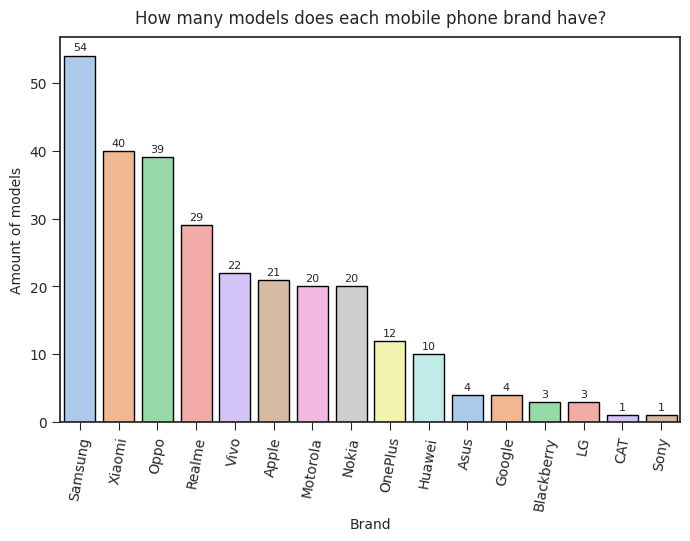

In [33]:
ordered_by_brand = df_clean['Brand'].value_counts().index.tolist()

fig, ax = plt.subplots(figsize = (8,5))
sns.countplot(data = df_clean, x = 'Brand', order = ordered_by_brand, palette = 'pastel', edgecolor = 'black')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
plt.bar_label(ax.containers[0], fontsize = 8, padding = 2)
plt.title('How many models does each mobile phone brand have?', pad = 10, fontsize = 12)
plt.ylabel('Amount of models')
plt.show()

**Samsung has the most models, followed by Xiaomi and Oppo.**

<h2> How is the RAM distributed? </h2>

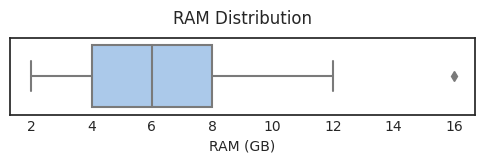

In [34]:
sns.set_style('white')
plt.style.use('seaborn-v0_8-white')

fig, ax = plt.subplots(figsize = (6,1))
sns.boxplot(data = df_clean, x = 'RAM (GB)', palette = 'pastel')
plt.title('RAM Distribution', pad = 10, fontsize = 12)
plt.show()

**Mobile phones in this dataset have an average RAM of 6 GB.**

<h2> How is the storage distributed? </h2>

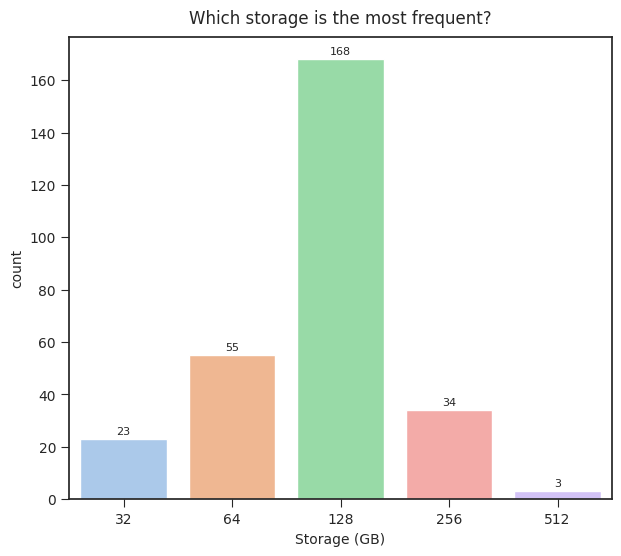

In [35]:
plt.style.use('seaborn-v0_8-ticks')
sns.set_style("ticks")

fig, ax = plt.subplots(figsize = (7,6))
sns.countplot(data = df_clean, x = 'Storage (GB)', palette = 'pastel')
plt.bar_label(ax.containers[0], fontsize = 8, padding = 2)
plt.title('Which storage is the most frequent?', pad = 10, fontsize = 12)
plt.show()

**128 GB is the most frequent storage in this dataset.**

<h2> How is the screen size distributed? </h2>

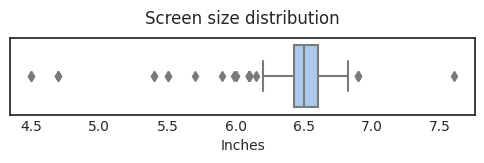

In [36]:
sns.set_style('white')
plt.style.use('seaborn-v0_8-white')

fig, ax = plt.subplots(figsize = (6,1))
sns.boxplot(data = df_clean, x = 'Screen Size (inches)', palette = 'pastel')
plt.title('Screen size distribution', pad = 10, fontsize = 12)
plt.xlabel('Inches')
plt.show()

**Mobile phones in this dataset have an average screen size of 6.5 inches.**

<h2>How is the battery capacity distruted? </h2>

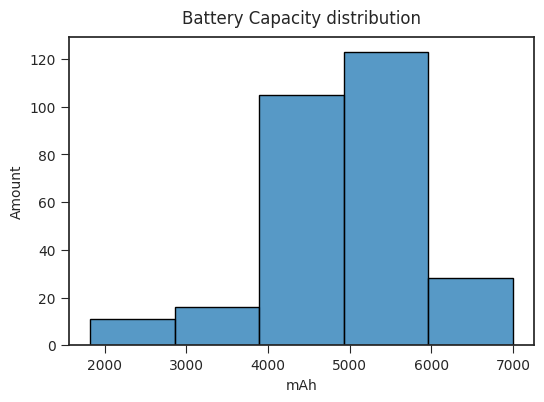

In [37]:
plt.style.use('seaborn-v0_8-ticks')
sns.set_style("ticks")

fig, ax = plt.subplots(figsize = (6,4))
sns.histplot(data = df_clean, x = 'Battery Capacity (mAh)', palette = 'pastel', bins = 5, edgecolor = 'black')
plt.title('Battery Capacity distribution', pad = 10, fontsize = 12)
plt.ylabel('Amount')
plt.xlabel('mAh')
plt.show()

**The majority have battery capacities between 4000 and 6000 mAh.**

<h2>Correlation matrix</h2>

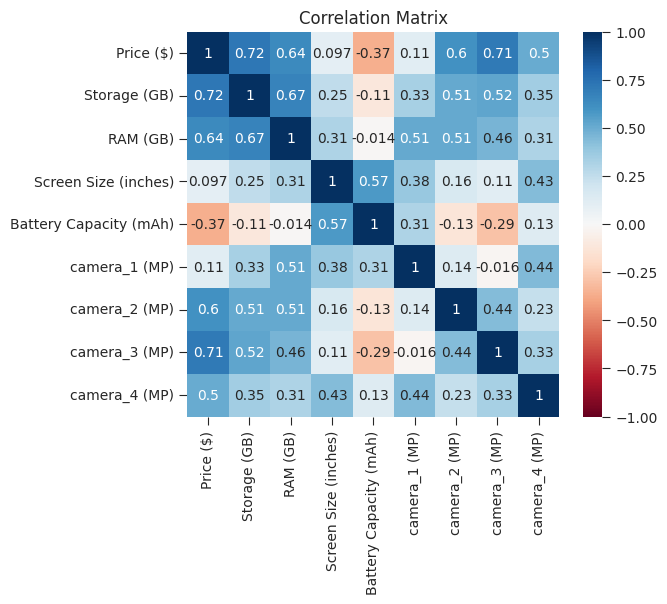

In [38]:
non_numeric_columns = df_clean.select_dtypes(exclude=['number']).columns
df_clean_numeric = df_clean.drop(columns=non_numeric_columns)

plt.figure(figsize=(6,5))
sns.heatmap(df_clean_numeric.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**According to the correlation matrix, storage capacity and RAM have the greatest impact on the price of a mobile phone. The correlation between the cameras and the price can be distorted because they are irregularly distributed.**

<h2>I've imported the dataset into Power BI and have created a dashboard.</h2>